<a href="https://colab.research.google.com/github/KrupalVasani/Machine-Learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
df=pd.read_csv('placement.csv')

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in lpa)')

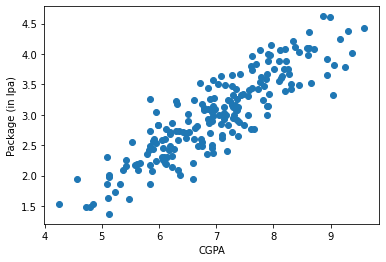

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [7]:
X=df.iloc[:,0:1]
y=df.iloc[:,1:2]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[3.89111601]])

Text(0, 0.5, 'Package (in lpa)')

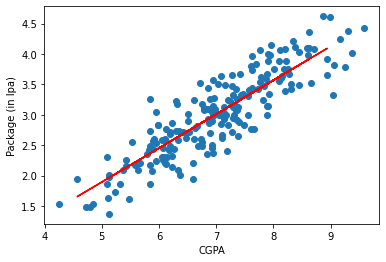

In [13]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test,lr.predict(X_test),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [14]:
m=lr.coef_
b=lr.intercept_

In [15]:
print("Slope: ",m)
print("Intercept: ",b)

Slope:  [[0.55795197]]
Intercept:  [-0.89611192]


In [25]:
#create linear regression class

class MyLinearRegression:
  coef_=0
  intercept_=0

  def __init__(self):
    pass
  
  def fit(self,X_train,y_train):
    Xtrain=X_train.values
    ytrain=y_train.values

    denominator=0
    numerator=0

    for i in range(Xtrain.shape[0]):
      numerator += (Xtrain[i]-Xtrain.mean())*(ytrain[i]-ytrain.mean())
      denominator += (Xtrain[i]-Xtrain.mean())*(Xtrain[i]-Xtrain.mean())

      self.coef_=(numerator/denominator)
      self.intercept_=ytrain.mean()-self.coef_*Xtrain.mean()    
    print("Slope: ",self.coef_)
    print('Intercept: ',self.intercept_)

  def predict(self,X_test):
    mydf=pd.DataFrame()
    mydf['package']=self.coef_*X_test+self.intercept_
    return mydf


In [26]:
my_lr=MyLinearRegression()
my_lr.fit(X_train,y_train)


Slope:  [0.55795197]
Intercept:  [-0.89611192]


Text(0, 0.5, 'Package (in lpa)')

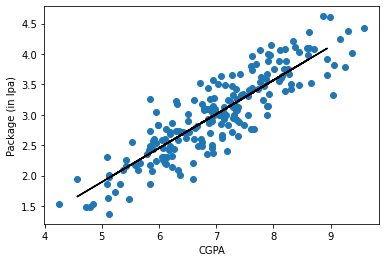

In [33]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test,my_lr.predict(X_test),color='black')
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')
